<a href="https://colab.research.google.com/github/shresth97/ML_repo/blob/main/EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Dataset Used - Insurance Dataset**

**PEARCH INTERNSHIP ASSESSEMENT**

##Import the necessary libraries 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##Importing Dataset

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/insurance (2).csv")

In [ ]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


 ##**Performing Exploratory Data Analysis**




## Checking Shape of the data 

In [ ]:
dataset.shape

(1338, 7)

##Checking Data type of each attribute 

In [ ]:
DataType = dataset.dtypes
print(DataType)         #Data type of each attribute 

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


##Checking the presence of missing values

In [ ]:
dataset.isnull()  #Checking the presence of missing values 
dataset.isna().apply(pd.value_counts)

#Means no null values present in rhe dataset

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


##5 point summary of numerical attributes 

In [ ]:
dataset["age"].max()




64

In [ ]:
dataset["region"]

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object

In [ ]:
dataset["sex"]

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [ ]:
dataset["charges"].max()

63770.42801

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


##Distribution of ‘bmi’, ‘age’ and ‘charges’ columns 

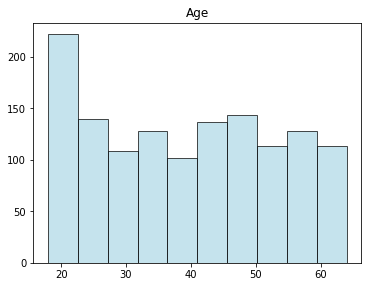

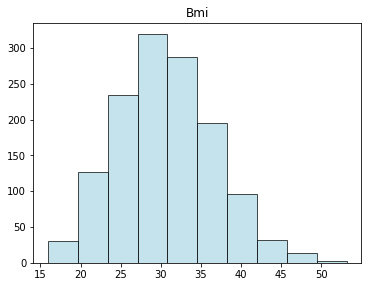

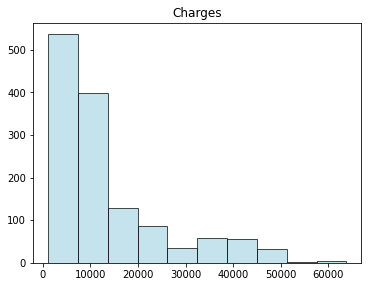

In [ ]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(dataset.age, color= "lightblue", edgecolor = 'black', alpha= 0.7)
plt.title('Age')
plt.show()


plt.figure(figsize= (20,15))
plt.subplot(3,3,2)
plt.hist(dataset.bmi, color = "lightblue", edgecolor= 'black', alpha= 0.7)
plt.title('Bmi')
plt.show()


plt.figure(figsize= (20,15))
plt.subplot(3,3,2)
plt.hist(dataset.charges, color= 'lightblue', edgecolor= 'black', alpha= 0.7)
plt.title("Charges")
plt.show()

##Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns 

In [ ]:
import scipy.stats as stats
Skewness = pd.DataFrame({'Skewness' : [stats.skew(dataset.bmi), stats.skew(dataset.age), stats.skew(dataset.charges)]}, 
                        index = ['bmi', 'age', 'charges'])
Skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


##Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns 


###Importing the required module

In [ ]:
import seaborn as sns

Text(0.5, 1.0, 'Charges Distribution')

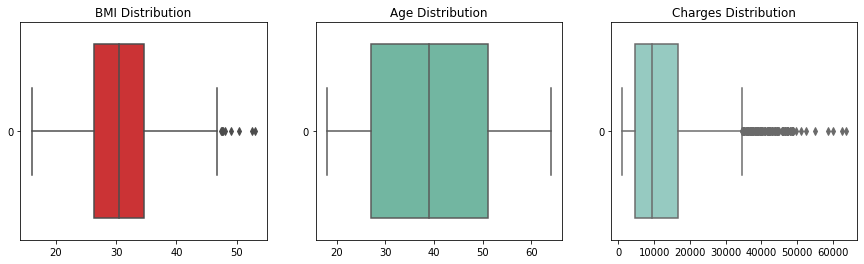

In [ ]:
#Checking presence of outliers using boxplot

fig, axes = plt.subplots(1,3, figsize= (15, 4))
sns.boxplot(data = dataset['bmi'], orient= 'h', palette= 'Set1', ax= axes[0])
sns.boxplot(data = dataset['age'], orient= 'h', palette= 'Set2', ax= axes[1])
sns.boxplot(data = dataset['charges'], orient= 'h', palette= 'Set3', ax= axes[2])
axes[0].set_title('BMI Distribution')
axes[1].set_title('Age Distribution')
axes[2].set_title('Charges Distribution')

###Distribution of categorical columns (include children) 


 ****

In [ ]:
print(dataset.children.dtype)
print(dataset.sex.dtype)
print(dataset.age.dtype)
print(dataset.region.dtype)
print(dataset.smoker.dtype)
print(dataset.bmi.dtype)
print(dataset.charges.dtype)

int64
object
int64
object
object
float64
float64


In [ ]:
#So Categorical Columns are- 'Sex', 'Region', 'Smoker', BUt we also have to include 'children'
dataset.describe(include = 'all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [ ]:
dataset_cat = dataset[['children', 'sex', 'region', 'smoker']]
dataset_cat.head(3)

,children,sex,region,smoker
0,0,female,southwest,yes
1,1,male,southeast,no
2,3,male,southeast,no


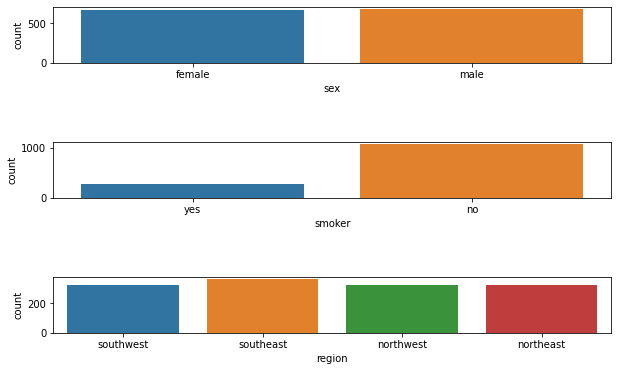

In [ ]:
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(5,1,1)
sns.countplot(data= dataset_cat, x= 'sex', ax= ax1)

ax2= fig.add_subplot(5,1,3)
sns.countplot(data= dataset_cat, x= 'smoker', ax= ax2)

ax3= fig.add_subplot(5,1,5)
sns.countplot(data= dataset_cat, x= 'region', ax= ax3)


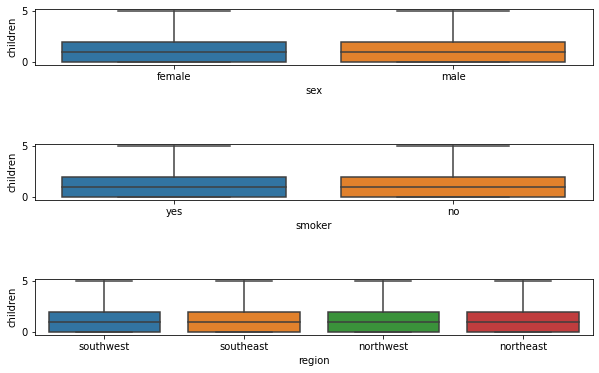

In [ ]:
fig= plt.figure(figsize= (10,6))

ax1 = fig.add_subplot(5,1,1)
sns.boxplot(data= dataset_cat, x= 'sex', y= 'children', ax= ax1)

ax2 = fig.add_subplot(5,1,3)
sns.boxplot(data= dataset_cat, x= 'smoker', y= 'children', ax= ax2)

ax3 = fig.add_subplot(5,1,5)
sns.boxplot(data= dataset_cat, x= 'region', y= 'children', ax= ax3)

###Pair plot that includes all the columns of the data frame 


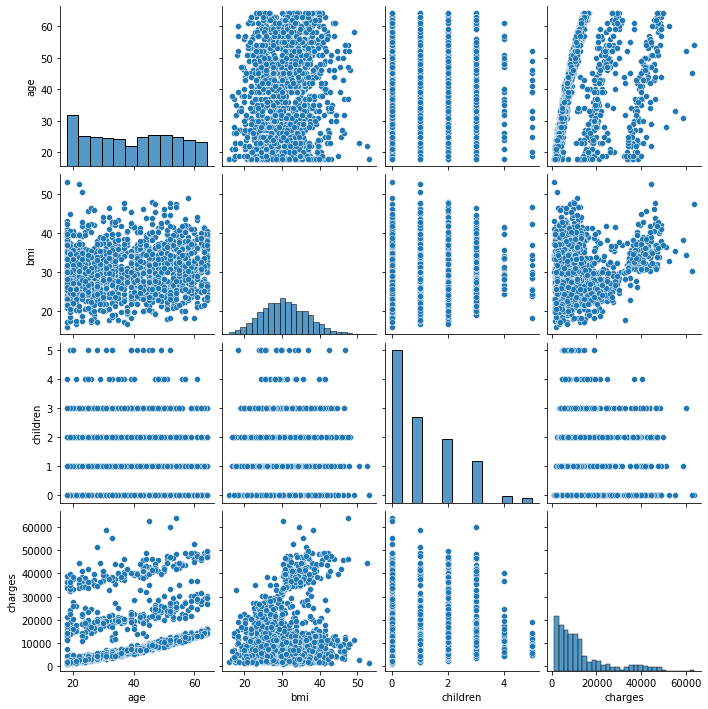

In [ ]:
sns.pairplot(dataset)

# **Do charges of people who smoke differ significantly from the people who don't?**

In [ ]:
print(dataset[dataset.smoker=='yes'][['charges']].mean) #selecting mean of charges corresponding to smokers
print(dataset[dataset.smoker=='no'][['charges']].mean) #selecting mean of charges corresponding to non-smokers
print(dataset[dataset.smoker=='yes'][['charges']].median)#selecting median of charges corresponding to smokers
print(dataset[dataset.smoker=='no'][['charges']].median)##selecting median of charges corresponding to non-smokers

<bound method DataFrame.mean of           charges
0     16884.92400
11    27808.72510
14    39611.75770
19    36837.46700
23    37701.87680
...           ...
1313  36397.57600
1314  18765.87545
1321  28101.33305
1323  43896.37630
1337  29141.36030

[274 rows x 1 columns]>
<bound method DataFrame.mean of           charges
1      1725.55230
2      4449.46200
3     21984.47061
4      3866.85520
5      3756.62160
...           ...
1332  11411.68500
1333  10600.54830
1334   2205.98080
1335   1629.83350
1336   2007.94500

[1064 rows x 1 columns]>
<bound method DataFrame.median of           charges
0     16884.92400
11    27808.72510
14    39611.75770
19    36837.46700
23    37701.87680
...           ...
1313  36397.57600
1314  18765.87545
1321  28101.33305
1323  43896.37630
1337  29141.36030

[274 rows x 1 columns]>
<bound method DataFrame.median of           charges
1      1725.55230
2      4449.46200
3     21984.47061
4      3866.85520
5      3756.62160
...           ...
1332  11411.68500


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 35.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


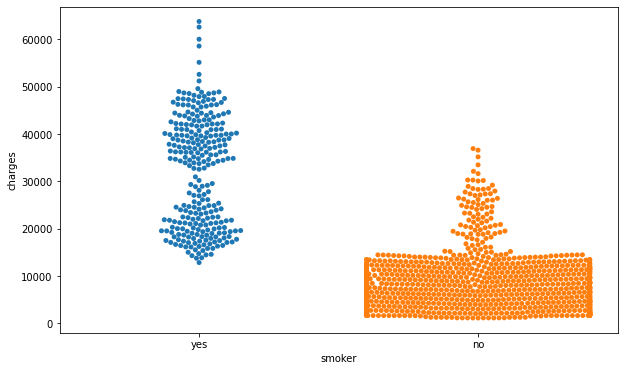

In [ ]:
plt.figure(figsize= (10,6))
sns.swarmplot(data= dataset[['smoker', 'charges']], x= 'smoker', y= 'charges')

**Yes, charges of people who smoke differ significantly from the people who don't** 

###**Does bmi of males differ significantly from that of females?**

In [ ]:
dataset.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
#Performing T-test to check dependency of bmi on gender
#For Knowledge: A t-test is a type of inferential statistic used to determine if there is a 
                #significant difference between the means of two groups, 
                #which may be related in certain features.
from scipy.stats import ttest_ind

In [ ]:

Ho = "Gender has no effect on bmi" #Null Hypothesis
Ha = "Gender does have an effect on bmi" # Stating an alternative hypothesis 

X = np.array(dataset[dataset.sex == "male"].bmi) #Selecting the bmi corresponding to males in from of
                                                 #an array
y = np.array(dataset[dataset.sex == "female"].bmi)#Selecting the bmi values corresponding to females 
                                                  #in the form of an array
#performing T-test
t, p_value = stats.ttest_ind(X, y, axis = 0)

if p_value < 0.05:
  print(f"{Ha} as the p_value ({ p_value.round()}) < 0.05 ")
else:
  print(f"{Ho} as the p_value ({ p_value.round(3)}) > 0.05")



Gender has no effect on bmi as the p_value (0.09) > 0.05


In [ ]:
# Chi_square test to check if smoking habits are different for different genders
Ho = "Gender has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Gender has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(dataset['sex'],dataset['smoker'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Gender has an effect on smoking habits as the p_value (0.007) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


In [ ]:
import copy

In [ ]:

# Test to see if the distributions of bmi values for females having different number of children, are significantly different

Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis


female_df = copy.deepcopy(dataset[dataset['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No. of children has no effect on bmi as the p_value (0.716) > 0.05
